# Churn Analysis and Prediction: Optimizing Customer Retention for a Travel Company

### Setup
For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.

---

### Project Objectives

1. **Conduct Exploratory Data Analysis (EDA)**: Analyze the customer dataset to uncover patterns and insights related to customer demographics, behavior, and churn rates.

2. **Develop Predictive Models**: Build and compare multiple predictive models (e.g., logistic regression, decision trees) to accurately predict customer churn.

3. **Optimize Model Performance**: Utilize hyperparameter tuning techniques, such as Grid Search, to enhance model accuracy and reliability.

4. **Evaluate Model Metrics**: Assess model performance using relevant metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

5. **Analyze Feature Importance**: Identify the most significant features influencing customer churn to provide actionable insights for retention strategies.

6. **Visualize Results**: Create visualizations (e.g., confusion matrix, ROC curve, scatter plots) to effectively communicate findings and model performance to stakeholders.

7. **Provide Recommendations**: Based on the analysis, offer strategic recommendations to improve customer retention and reduce churn rates.

8. **Establish a Predictive Framework**: Develop a robust framework for ongoing customer churn analysis that can be applied in future business scenarios.

---

### Installing Required Libraries

In [150]:
%pip install seaborn

### Importing Required Libraries

In [151]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

### Load the dataset

In [152]:
try:
    url = 'Customertravel.csv'
    df=pd.read_csv(url)
except FileNotFoundError:
    print("The file 'cause_of_deaths.csv' was not found.")
    exit()
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


### Display initial information

In [153]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [154]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [156]:
df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

## Data Cleaning & Processing: To clean and organize the dataset, you can use Python libraries such as Pandas and NumPy. Here are some steps you can follow:

### Handle missing values: Use Pandas to identify and handle missing values in the dataset.

In [157]:
# Find duplicated Raws
df.duplicated().sum()

507

In [158]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Check if duplicates were removed
print(f"Number of rows before removing duplicates: {df.shape[0]}")
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

Number of rows before removing duplicates: 954
Number of rows after removing duplicates: 447


In [159]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

##  Age distribution across all customers

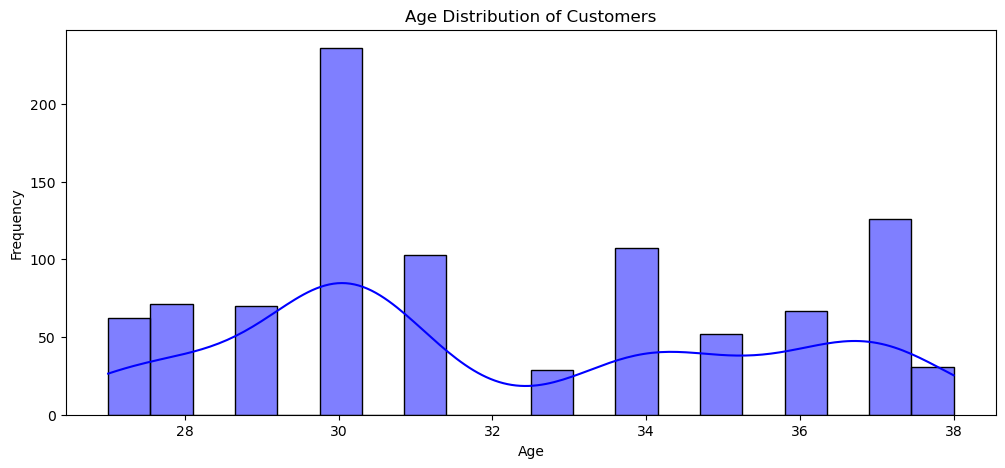

In [160]:
plt.figure(figsize=(12,5))
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Age distribution by churn (Target) 

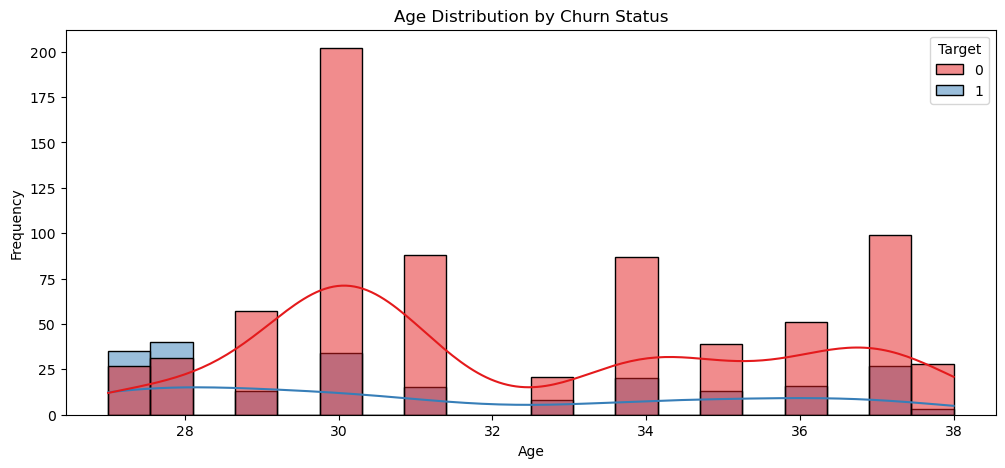

In [161]:
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='Age', hue='Target', kde=True, bins=20, palette='Set1')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## FrequentFlyer vs Target (Churn)

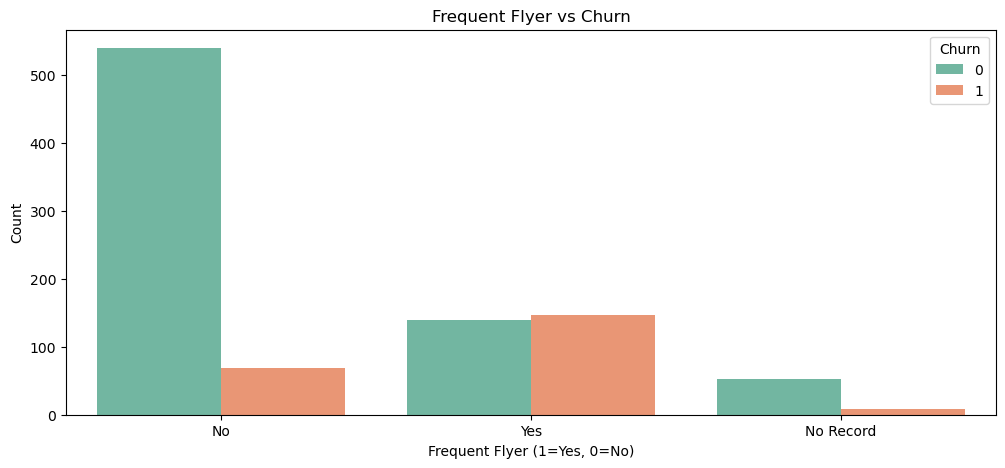

In [162]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='FrequentFlyer', hue='Target', palette='Set2')
plt.title('Frequent Flyer vs Churn')
plt.xlabel('Frequent Flyer (1=Yes, 0=No)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

## AnnualIncomeClass vs Target (Churn)

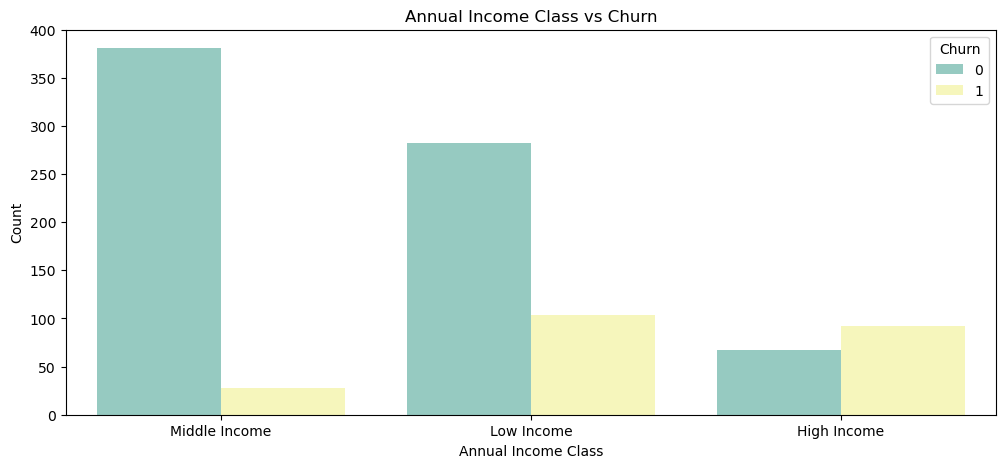

In [163]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='AnnualIncomeClass', hue='Target', palette='Set3')
plt.title('Annual Income Class vs Churn')
plt.xlabel('Annual Income Class')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

## Bar chart for BookedHotelOrNot vs Target

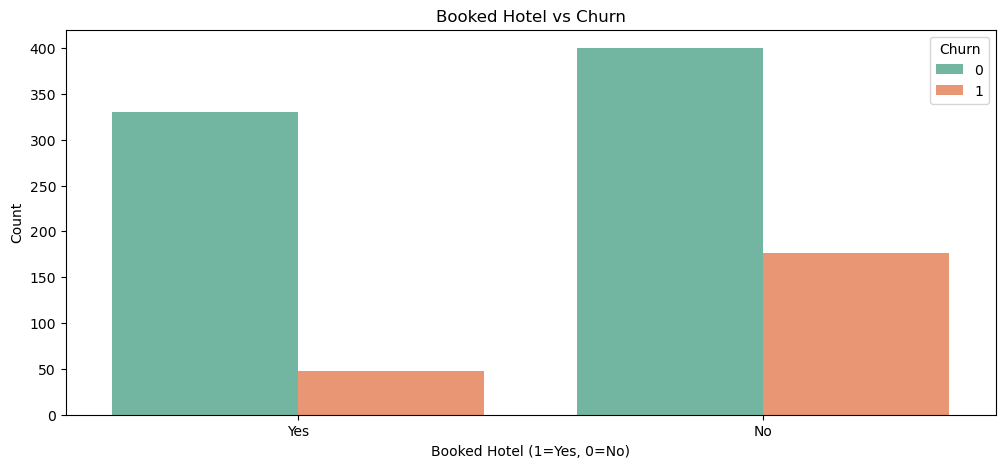

In [164]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='BookedHotelOrNot', hue='Target', palette='Set2')
plt.title('Booked Hotel vs Churn')
plt.xlabel('Booked Hotel (1=Yes, 0=No)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

## ServicesOpted vs Target (Churn)

C:\Users\Mohamed Khater\AppData\Local\Temp\ipykernel_8448\3129594578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='ServicesOpted', data=df, palette='Set1')


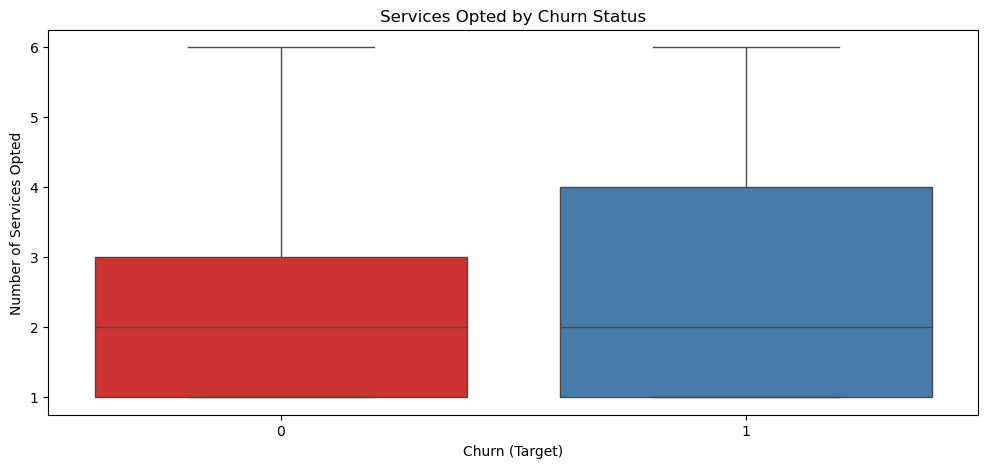

In [165]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Target', y='ServicesOpted', data=df, palette='Set1')
plt.title('Services Opted by Churn Status')
plt.xlabel('Churn (Target)')
plt.ylabel('Number of Services Opted')
plt.show()

## Boxplot for Age vs Target (Churn)

C:\Users\Mohamed Khater\AppData\Local\Temp\ipykernel_8448\32649402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='Age', data=df, palette='Set2')


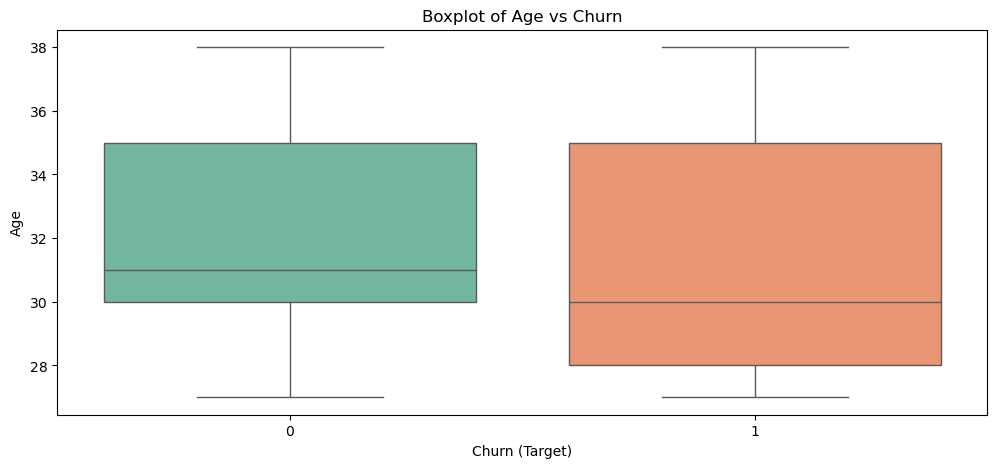

In [166]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Target', y='Age', data=df, palette='Set2')
plt.title('Boxplot of Age vs Churn')
plt.xlabel('Churn (Target)')
plt.ylabel('Age')
plt.show()

## AccountSyncedToSocialMedia vs Target (Churn)

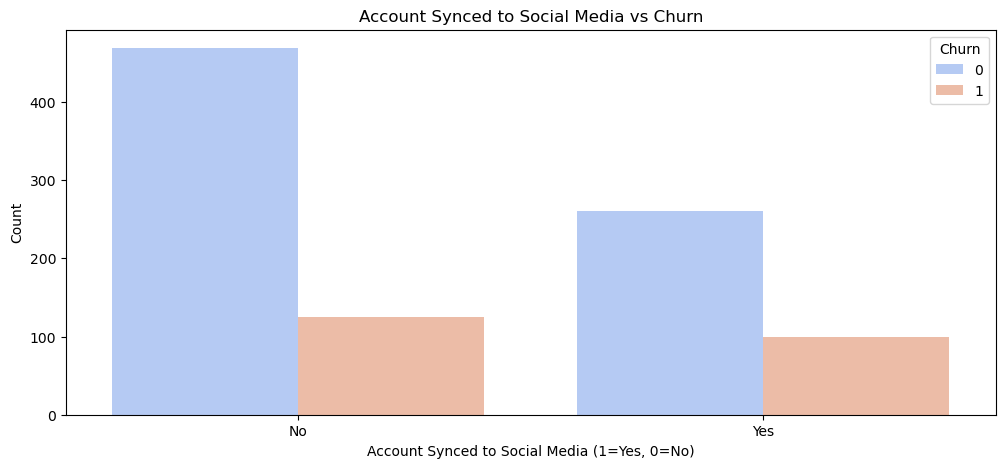

In [167]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='AccountSyncedToSocialMedia', hue='Target', palette='coolwarm')
plt.title('Account Synced to Social Media vs Churn')
plt.xlabel('Account Synced to Social Media (1=Yes, 0=No)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

## BookedHotelOrNot vs Target (Churn)

C:\Users\Mohamed Khater\AppData\Local\Temp\ipykernel_8448\990618181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AnnualIncomeClass', y='Target', data=segmentation_income, palette='Set1')


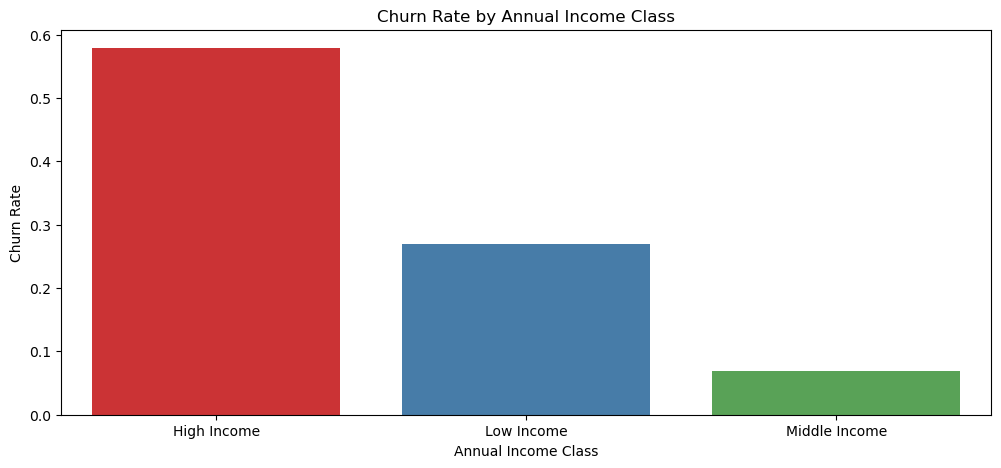

In [168]:
segmentation_income = df.groupby('AnnualIncomeClass')['Target'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x='AnnualIncomeClass', y='Target', data=segmentation_income, palette='Set1')
plt.title('Churn Rate by Annual Income Class')
plt.xlabel('Annual Income Class')
plt.ylabel('Churn Rate')
plt.show()

## Segment analysis by Frequent Flyer

C:\Users\Mohamed Khater\AppData\Local\Temp\ipykernel_8448\3993907009.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FrequentFlyer', y='Target', data=segmentation_frequentflyer, palette='Set2')


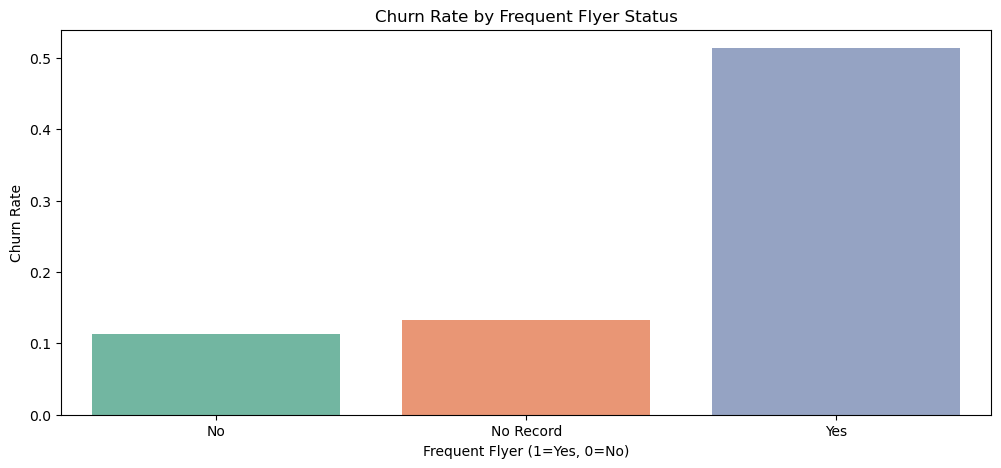

In [169]:
segmentation_frequentflyer = df.groupby('FrequentFlyer')['Target'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x='FrequentFlyer', y='Target', data=segmentation_frequentflyer, palette='Set2')
plt.title('Churn Rate by Frequent Flyer Status')
plt.xlabel('Frequent Flyer (1=Yes, 0=No)')
plt.ylabel('Churn Rate')
plt.show()

##  Segment analysis by Age

C:\Users\Mohamed Khater\AppData\Local\Temp\ipykernel_8448\3352989270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Target', data=segmentation_age, palette='Set3')


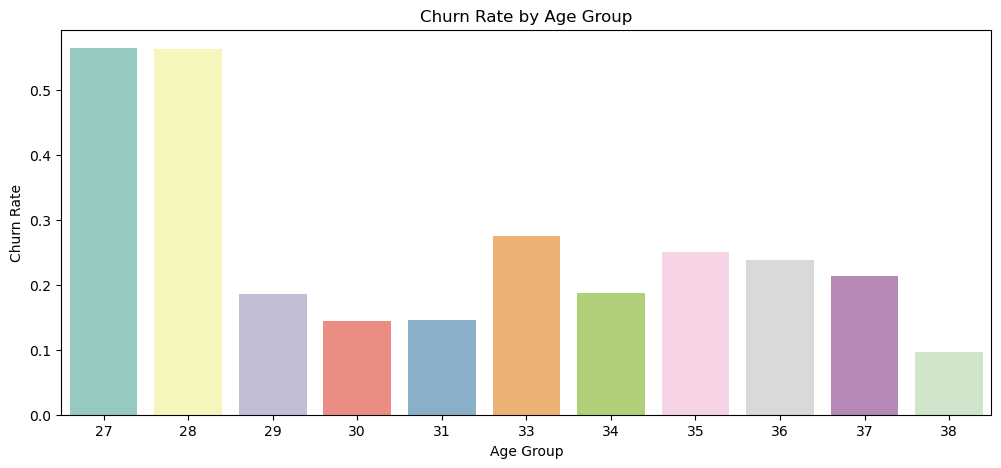

In [170]:
segmentation_age = df.groupby('Age')['Target'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x='Age', y='Target', data=segmentation_age, palette='Set3')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.show()

## Segment analysis by ServicesOpted and Churn

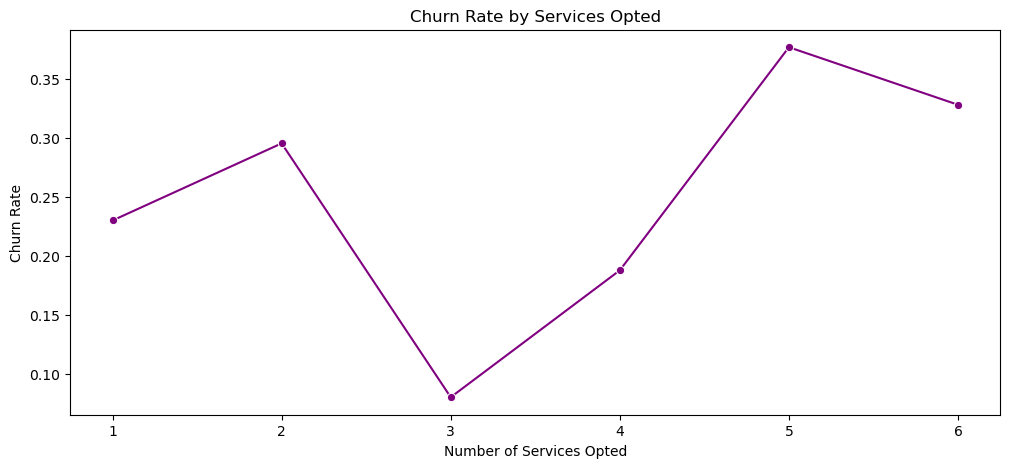

In [171]:
segmentation_services = df.groupby('ServicesOpted')['Target'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x='ServicesOpted', y='Target', data=segmentation_services, marker='o', color='purple')
plt.title('Churn Rate by Services Opted')
plt.xlabel('Number of Services Opted')
plt.ylabel('Churn Rate')
plt.show()

## Segment analysis by AccountSyncedToSocialMedia and BookedHotelOrNot

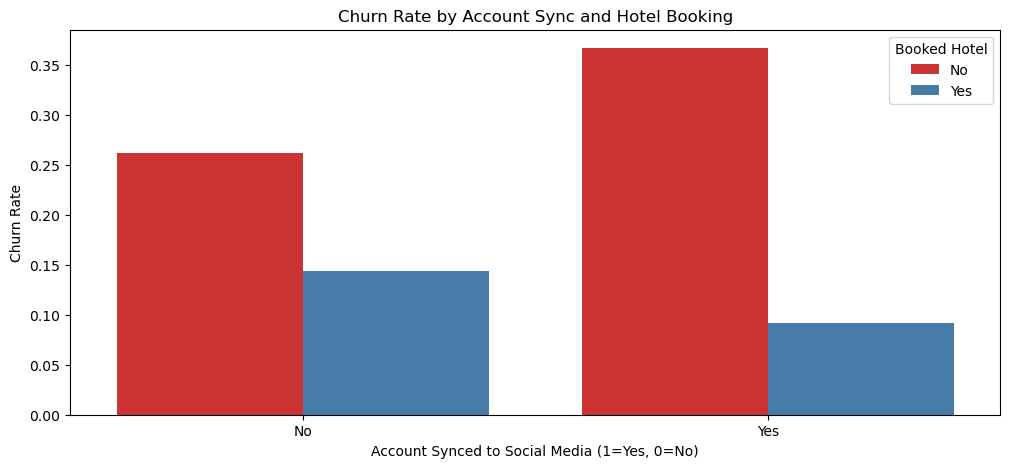

In [172]:

segmentation_sync = df.groupby(['AccountSyncedToSocialMedia', 'BookedHotelOrNot'])['Target'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(x='AccountSyncedToSocialMedia', y='Target', hue='BookedHotelOrNot', data=segmentation_sync, palette='Set1')
plt.title('Churn Rate by Account Sync and Hotel Booking')
plt.xlabel('Account Synced to Social Media (1=Yes, 0=No)')
plt.ylabel('Churn Rate')
plt.legend(title='Booked Hotel')
plt.show()

In [173]:
# Preprocessing
X = df.drop('Target', axis=1)
y = df['Target']

# Encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model Pipeline using Logistic Regression
pipeline = Pipeline([
    ('logreg', LogisticRegression(max_iter=1000))  # Increase max_iter if convergence warning occurs
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'logreg__C': [0.1, 1.0, 10.0],  # Regularization strength
    'logreg__solver': ['liblinear', 'saga']  # Solver options for logistic regression
}
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

# Evaluate model
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       153
           1       0.64      0.55      0.59        38

    accuracy                           0.85       191
   macro avg       0.76      0.74      0.75       191
weighted avg       0.84      0.85      0.84       191

[[141  12]
 [ 17  21]]


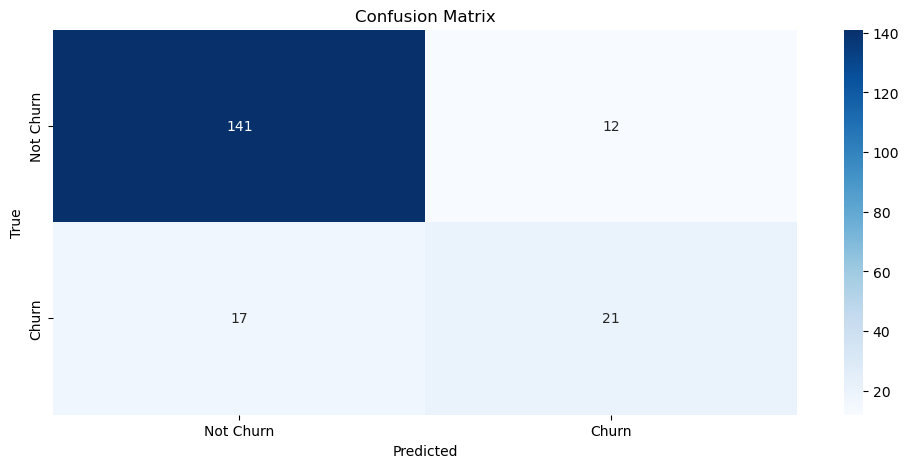

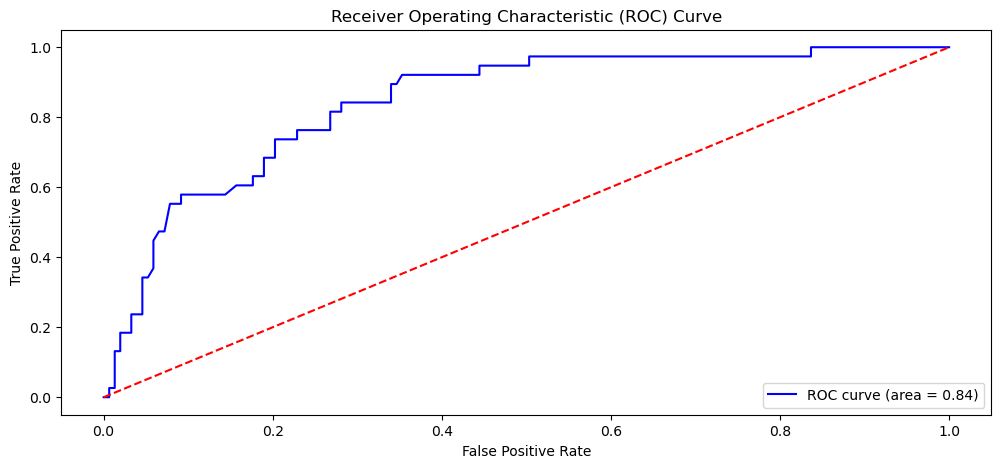

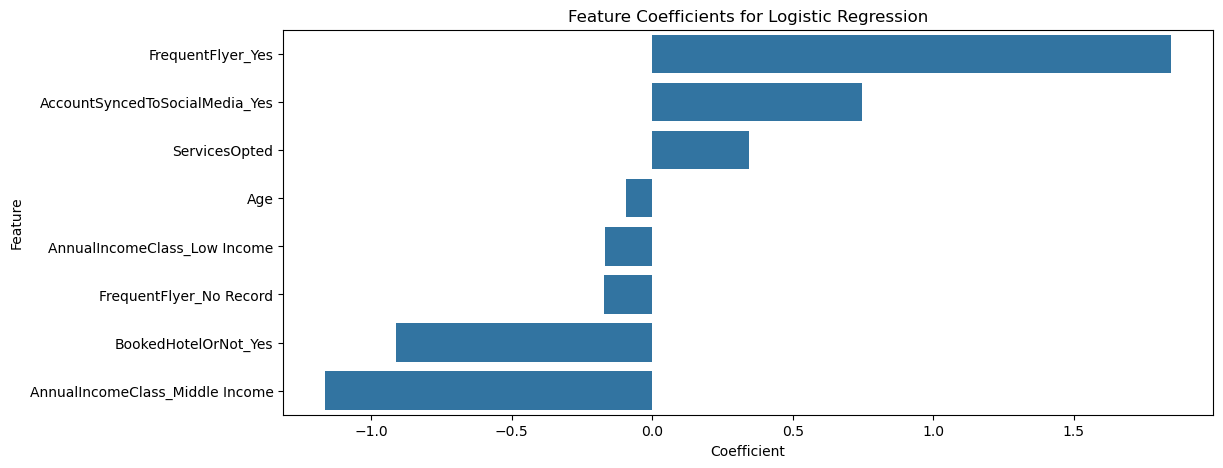

In [174]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(12, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve Visualization
y_probs = grid.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(12, 5))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance Visualization
coefficients = grid.best_estimator_.named_steps['logreg'].coef_[0]
feature_names = X_encoded.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 5))
sns.barplot(x='Coefficient', y='Feature', data=importance_df)
plt.title('Feature Coefficients for Logistic Regression')
plt.show()